In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir("E:/EBAC/Material/M19")

In [2]:
df = pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [3]:
# Remover características categóricas
df.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'], axis=1, inplace=True)
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,33,200
1,3.5,6,12.6,9.4,11.2,25,263
2,2.0,4,11.0,8.6,9.9,29,232
3,2.0,4,11.3,9.1,10.3,27,242
4,2.0,4,11.2,8.0,9.8,29,230


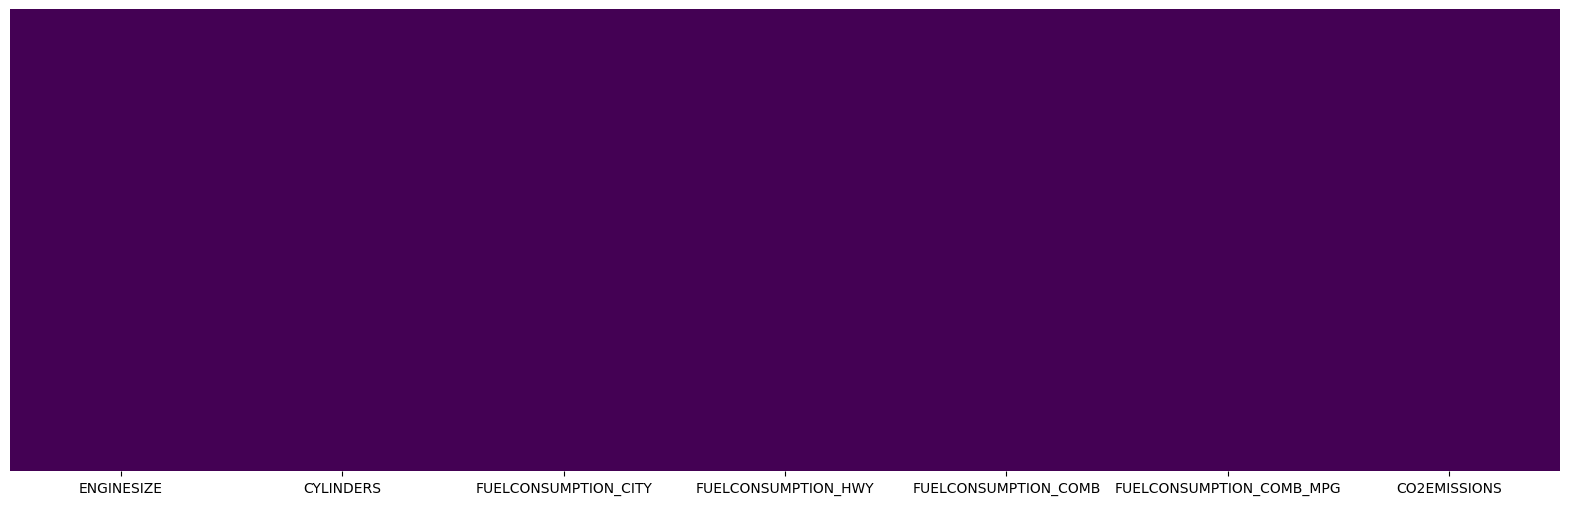

In [4]:
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [41]:
# Analisis de regresion multiple

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

regresionmultiple = LinearRegression()
regresionmultiple.fit(X_train, y_train)

y_pred = regresionmultiple.predict(X_test)

# Evaluacion del modelo
print("Intercepto: ", regresionmultiple.intercept_)
print("Coeficientes: ", regresionmultiple.coef_)



Intercepto:  121.90611046279307
Coeficientes:  [ 0.43160223  5.50285227 -0.6614582   1.15989448 13.74061389 -1.85532002]


In [42]:
# Impresión de indicadores de bondad de ajuste
print("Valor de R cuadrada:", r2_score(y_test, y_pred))
print("Error absoluto medio:", metrics.mean_absolute_error(y_test, y_pred))
print("Error cuadrático medio:", metrics.mean_squared_error(y_test, y_pred))
print("Raíz del Error cuadrático medio:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Valor de R cuadrada: 0.9859198995539085
Error absoluto medio: 5.725511226830299
Error cuadrático medio: 62.05323405498567
Raíz del Error cuadrático medio: 7.877387514587921


In [43]:
# Compararresultados de regresion multiple
comparacionRegresionMultiple = pd.DataFrame({'Real' : y_test, 'Prediccion': y_pred})
print(comparacionRegresionMultiple.head())

     Real  Prediccion
786   334  320.445923
94    322  322.451412
265   359  346.244180
741   171  174.381124
861   192  196.870806


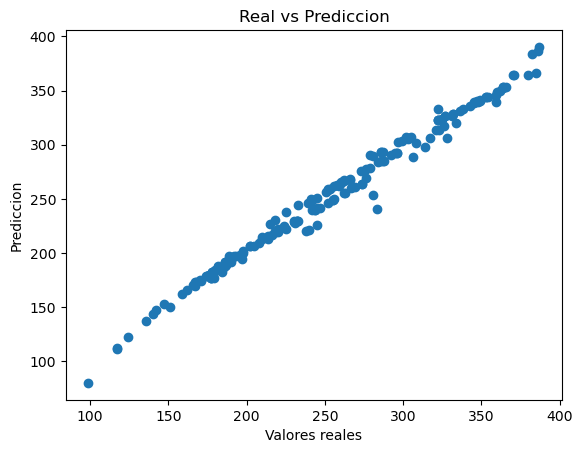

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Prediccion")
plt.title("Real vs Prediccion")
plt.show()

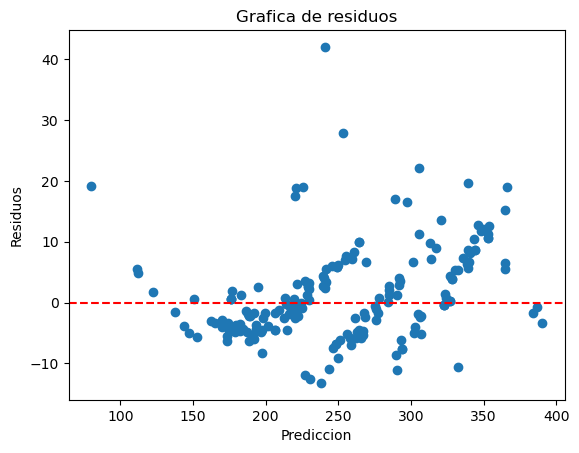

In [45]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prediccion")
plt.ylabel("Residuos")
plt.title("Grafica de residuos")
plt.show()

In [10]:
# Un alto valor de R cuadrado pero al mismo tiempo valores altes de MSE y MSA puede significar que aunque el modelo explica gran parte del caso,
# los errores deben ser considerables en las predicciones y que las regresiones de Ridge y Laso pueden ser mas utiles al reducir la complejidad del
# model al remover informacion irrelevante. Pero al ver la comparacion entre el df real contra prediccion se puede apreciar que los valores obtenidos
# son bastante cercanos y pueden ser utilizados


# Modelo Ridge

In [36]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

alpha_range = 10.**np.arange(-2, 3)
alpha_range

ridgeregcv = make_pipeline(StandardScaler(), RidgeCV(alphas=alpha_range, scoring='neg_mean_squared_error'))
ridgeregcv.fit(X_test, y_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         scoring='neg_mean_squared_error'))])

In [37]:
alphaCV = ridgeregcv.named_steps['ridgecv'].alpha_
print("alphaCV: ", alphaCV)

# Predicción mediante el mejor valor de Alpha
y_pred = ridgeregcv.predict(X_test)

# Impresión de indicadores de bondad de ajuste
print("Valor de R cuadrada:", r2_score(y_test, y_pred))
print("Error absoluto medio:", metrics.mean_absolute_error(y_test, y_pred))
print("Error cuadrático medio:", metrics.mean_squared_error(y_test, y_pred))
print("Raíz del Error cuadrático medio:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

alphaCV:  0.1
Valor de R cuadrada: 0.9934590333863126
Error absoluto medio: 2.3808139819723464
Error cuadrático medio: 28.8270764671757
Raíz del Error cuadrático medio: 5.369085254228666


In [38]:
# Comparar resultados de Ridge
comparacionRidge = pd.DataFrame({'Real' : y_test, 'Prediccion': y_pred})
print(comparacionRidge.head())

     Real  Prediccion
786   334  333.826020
94    322  324.150733
265   359  356.495079
741   171  171.270512
861   192  193.061875


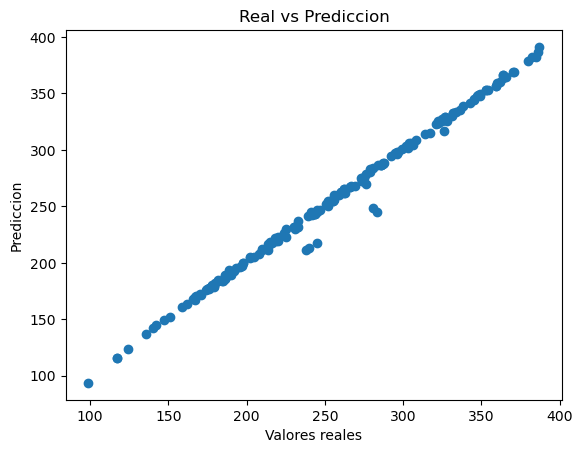

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Prediccion")
plt.title("Real vs Prediccion")
plt.show()

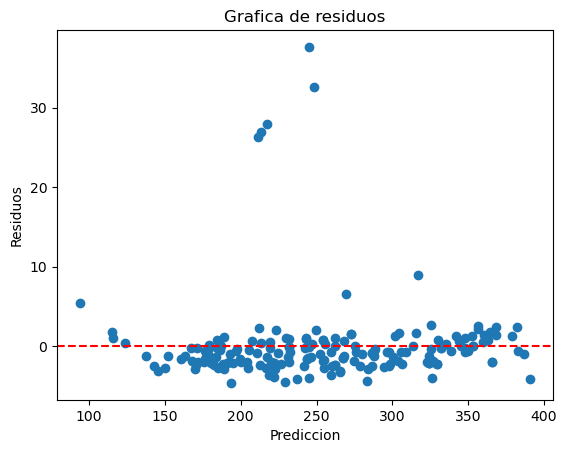

In [40]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prediccion")
plt.ylabel("Residuos")
plt.title("Grafica de residuos")
plt.show()

# Modelo Lasso

In [49]:
from sklearn.linear_model import LassoCV
lassoregcv = make_pipeline(StandardScaler(), LassoCV(alphas=None, n_alphas=100, random_state=1))
lassoregcv.fit(X_train, y_train)

lassoalphaCV = lassoregcv.named_steps['lassocv'].alpha_
print("alphaCV: ", lassoalphaCV)

alphaCV:  0.2020707777384846


In [31]:
intercept = lassoregcv.named_steps['lassocv'].intercept_
coef = lassoregcv.named_steps['lassocv'].coef_
print("Intercepto: ", intercept)
print("Coeficientes: ", coef)

Intercepto:  260.56481481481484
Coeficientes:  [  0.47810463  10.47763799  15.91376891  12.35638766  12.42314344
 -13.65363348]


In [32]:
#Predicción mediante regresión de Lasso con un Alpha óptimo
y_pred= lassoregcv.predict(X_test)

# Impresión de indicadores de bondad de ajuste
print("Valor de R cuadrada:", r2_score(y_test, y_pred))
print("Error absoluto medio:", metrics.mean_absolute_error(y_test, y_pred))
print("Error cuadrático medio:", metrics.mean_squared_error(y_test, y_pred))
print("Raíz del Error cuadrático medio:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Valor de R cuadrada: 0.9857659027213153
Error absoluto medio: 5.779799117769115
Error cuadrático medio: 62.73192250136592
Raíz del Error cuadrático medio: 7.920348635089614


In [33]:
# Comparar resultados de Lasso
comparacionLaso = pd.DataFrame({'Real' : y_test, 'Prediccion': y_pred})
print(comparacionLaso.head())

     Real  Prediccion
786   334  320.274886
94    322  322.266586
265   359  346.144632
741   171  174.268796
861   192  196.514337


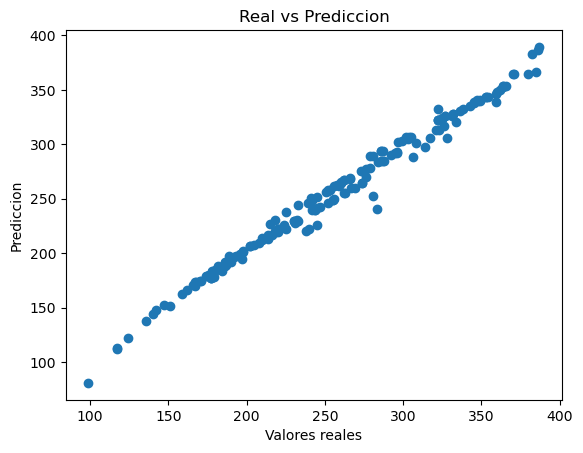

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Prediccion")
plt.title("Real vs Prediccion")
plt.show()

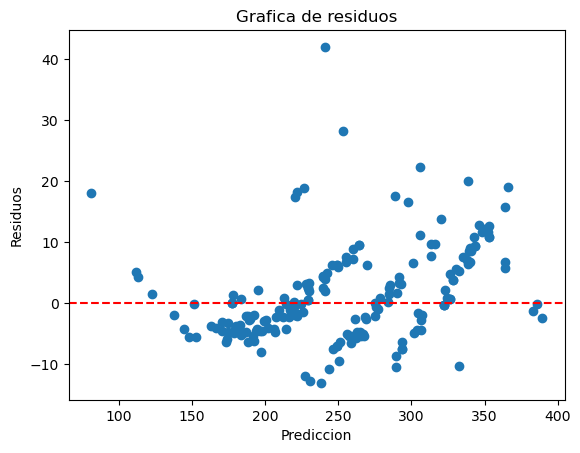

In [35]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prediccion")
plt.ylabel("Residuos")
plt.title("Grafica de residuos")
plt.show()

# Resultados

A pesar de que los tres modelos obtuvieron valores muy cercanos a los reales, el mejor modelo en este caso fue el modelo Ridge devido a su alto valor de R^2 (0.9934) y el valor mas bajo de los tres modelos de Raíz del Error cuadrático medio, que aunque los resultados no son exactos, la comparacion entre los valores reales y predichos son muy cercanos y donde la grafica de residuos es la que mas se alinea con la prediccion, podemos utilizar estos datos como valores confiables.